 Classical feedforward neural network (ANN) to classify QEC error syndromes based on the noisy dataset generated from the 3-qubit repetition code.

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8254 - loss: 0.5801 - val_accuracy: 0.7071 - val_loss: 0.5418
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8653 - loss: 0.5260 - val_accuracy: 0.9500 - val_loss: 0.5013
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9243 - loss: 0.4934 - val_accuracy: 0.9500 - val_loss: 0.4649
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9437 - loss: 0.4547 - val_accuracy: 0.9500 - val_loss: 0.4246
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9376 - loss: 0.4184 - val_accuracy: 0.9500 - val_loss: 0.3852
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9376 - loss: 0.3788 - val_accuracy: 0.9500 - val_loss: 0.3481
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9291 - loss: 0.3552 - val_accuracy: 0.9500 - val_loss: 0.3128
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9486 - loss: 0.3037 - val_accuracy: 0.9500 - val_loss

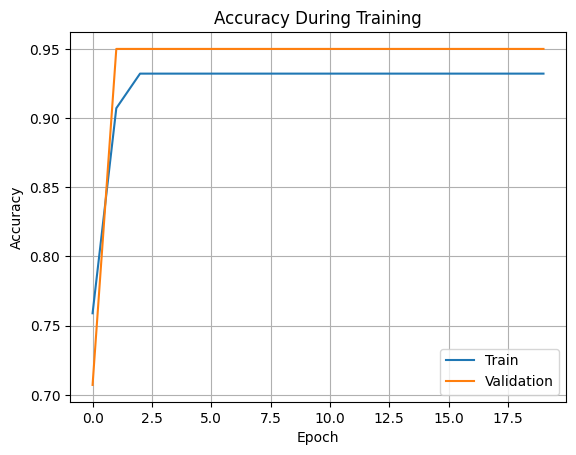

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading QEC Syndrome data 
df = pd.read_csv("qec_noisy_syndrome_dataset.csv")
X = df[['syndrome_1', 'syndrome_2']].values
y = np.array([bin(e).count('1') % 2 for e in df['error_class']])  # Parity: even(0) / odd(1)

# Normalize
X = X.astype('float32')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Model building
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),           # Input: 2 syndrome bits
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output: binary (even/odd)
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=16)

# Evaluating
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Accuracy (Classical NN):", test_acc)

# Prediction
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


To evaluate the robustness of the classical neural network, we tested it on a 10% bit-flip noisy version of the syndrome dataset.


In [2]:
# Injecting noise into Test Syndrome
def add_bitflip_noise(X, flip_prob=0.1):
    X_noisy = X.copy()
    for i in range(len(X_noisy)):
        for j in range(len(X_noisy[i])):
            if np.random.rand() < flip_prob:
                X_noisy[i][j] = 1 - X_noisy[i][j]  # Flip 0 ↔ 1
    return X_noisy

X_test_noisy = add_bitflip_noise(X_test, flip_prob=0.1)

# Get predictions on noisy test input
y_pred_prob_noisy = model.predict(X_test_noisy)
y_pred_noisy = (y_pred_prob_noisy > 0.5).astype(int)

# Calculate accuracy
noisy_acc = accuracy_score(y_test, y_pred_noisy)
print("Test Accuracy on 10% Noisy Input (Classical NN):", noisy_acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
Test Accuracy on 10% Noisy Input (Classical NN): 0.8633333333333333
